In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
wbd = gpd.read_file('../gis_data/huc2_boundaries.geojson')

In [3]:
data = pd.read_pickle('./data/temperature_comparison_area_weighted.pcl')

In [5]:
# fix some of the data
data['awR'] = 1. - data.awR

In [6]:
wbd = wbd.loc[wbd.HUC2.isin(data.region.unique())]

In [7]:
wbd.sort_values('HUC2', inplace=True, ascending=True)
wbd.reset_index(inplace=True)

In [8]:
def make_plot(forcingComp,forcingType,var,label = '',cmap='hot_r',printFig=False):
    df = data.loc[(data.forcingComp == forcingComp) & (data.forcingType == forcingType)].copy()
    df.sort_values('region',inplace=True, ascending=True)
    df.reset_index(inplace=True)

    wbd['metric'] = df[var].round(2)
    
    if var == 'proDiff':
        wbd.metric *= 100.
    
    vmin = wbd.metric.min()
    vmax = wbd.metric.max()
    ax = wbd.plot(column='metric',figsize = (15,10), cmap = cmap, vmin = vmin, vmax = vmax)
    plt.title('%s %s'%(forcingComp,forcingType), fontsize = 18)
    fig = ax.get_figure()
    cax = fig.add_axes([0.91, 0.125, 0.03, 0.75])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # fake up the array of the scalar mappable. Urgh...
    sm._A = []
    cb = fig.colorbar(sm,cax=cax)
    # colorbar with geopandas comes from here: https://stackoverflow.com/questions/36008648/colorbar-on-geopandas
    cb.set_label(label = label, fontsize = 14)
    plt.savefig('./figures/CONUS/%s/CONUS_%s_%s_%s.png'%(var,forcingComp,forcingType,var), bbox_inches='tight',dpi=300)
    plt.close()

In [9]:
variables = ['awRMSE','awMAE','awR','proDiff']
labels = ["Area weighted mean RMSE\n[$^{\circ}$ F]",
         "Area weighted mean MAE\n[$^{\circ}$ F]",
         "Area weighted mean Pearson's R\n[]",
         "Proportion of HRUs with\npVal <= 0.05 [%]"]

for var,label in zip(variables,labels):
    for forcingComp in data.forcingComp.unique():
        for forcingType in data.forcingType.unique():
            make_plot(forcingComp,forcingType,var,label=label,printFig=True)
    print('%s Complete!'%(var))

awRMSE Complete!
awMAE Complete!
awR Complete!
proDiff Complete!


In [41]:
var = 'proDiff'
comparison = 'livneh2daymet'
forcingType = 'tmin'
cmap = 'hot_r'

df = data.loc[(data.forcingComp == comparison) & (data.forcingType == forcingType)].copy()
df.sort_values('region',inplace=True, ascending=True)
df.reset_index(inplace=True)

wbd['metric'] = df[var]

if var == 'awpVal': # reclassify p values
    wbd.loc[wbd.metric > 0.05,'metric'] = 0
    wbd.loc[wbd.metric <= 0.05,'metric'] = 1

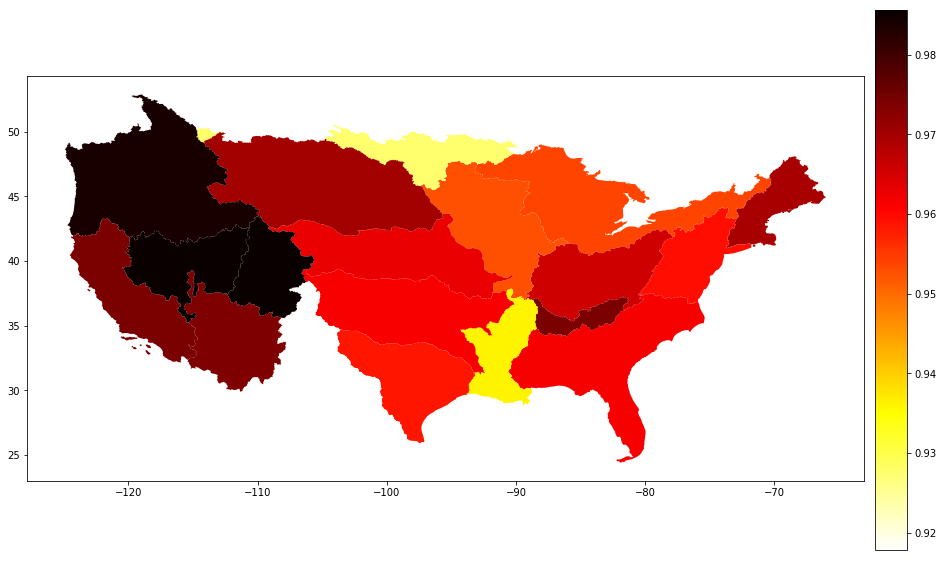

In [42]:
vmin = wbd.metric.min()
vmax = wbd.metric.max()
ax = wbd.plot(column='metric',figsize = (15,10), cmap = cmap, vmin = vmin, vmax = vmax)

fig = ax.get_figure()
cax = fig.add_axes([0.91, 0.125, 0.03, 0.75])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
cb = fig.colorbar(sm,cax=cax)
# colorbar with geopandas comes from here: https://stackoverflow.com/questions/36008648/colorbar-on-geopandas
#cb.set_label(label = 'Tmin RMSE [$^{\circ}$C]', fontsize = 14)